In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''



## Relation to Logistic Regression

As with the separable case, we can re-cast the SVM for nonseparable distributions in terms of the minimization of a regularized error function. This will also allow us to highlight similarities, and differences, compared to the logistic regression model.

We have seen that for data points that are on the correct side of the margin boundary, and which therefore satisfy $ y_n t_n \geq 1 $, we have $ \xi_n = 0 $, and for the remaining points, we have:

$$
\xi_n = 1 - y_n t_n.
$$

Thus, the objective function (7.21) can be written (up to an overall multiplicative constant) in the form:

$$
\sum_{n=1}^N E_{SV}(y_n t_n) + \lambda \|w\|^2,
$$

where $ \lambda = (2C)^{-1} $, and $ E_{SV}(\cdot) $ is the hinge error function defined by:

$$
E_{SV}(y_n t_n) = [1 - y_n t_n]_+,
$$

where $ [\cdot]_+ $ denotes the positive part. The hinge error function, so-called because of its shape, is plotted in Figure 7.5. It can be viewed as an approximation to the misclassification error, i.e., the error function that ideally we would like to minimize, which is also shown in Figure 7.5.

When we considered the logistic regression model in Section 4.3.2, we found it convenient to work with the target variable $ t \in \{0, 1\} $. For comparison with the support vector machine, we first reformulate maximum likelihood logistic regression using the target variable $ t \in \{-1, 1\} $. To do this, we note that:

$$
p(t = 1 | y) = \sigma(y),
$$

where $ y(x) $ is given by (7.1), and $ \sigma(y) $ is the logistic sigmoid function defined by (4.59). It follows that:

$$
p(t = -1 | y) = 1 - \sigma(y) = \sigma(-y),
$$

where we have used the properties of the logistic sigmoid function. Hence, we can write:

$$
p(t | y) = \sigma(y t).
$$

From this, we can construct an error function by taking the negative logarithm of the likelihood function that, with a quadratic regularizer, takes the form:

$$
\sum_{n=1}^N E_{LR}(y_n t_n) + \lambda \|w\|^2,
$$

where:

$$
E_{LR}(y t) = \ln(1 + \exp(-y t)).
$$

For comparison with other error functions, we can divide by $ \ln(2) $ so that the error function passes through the point $ (0, 1) $. This rescaled error function is also plotted in Fig.5, and we see that it has a similar form to the support vector error function.

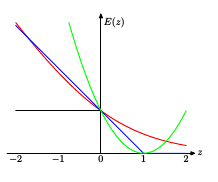

Fig.5 Plot of the ‘hinge’ error function used in support vector machines, shown in blue, along with the error function for logistic regression, rescaled by a factor of 1/ ln(2) so that it passes through the point (0, 1), shown in red. Also shown are the misclassiﬁcation error in black and the squared error in green.

The key difference is that the flat region in $E_{SV}(y t) $ leads to sparse solutions. Both the logistic error and the hinge loss can be viewed as continuous approximations to the misclassification error. Another continuous error function that has sometimes been used to solve classification problems is the squared error, which is again plotted in Figure 7.5. It has the property, however, of placing increasing emphasis on data points that are correctly classified but that are a long way from the decision boundary on the correct side. Such points will be strongly weighted at the expense of misclassified points, and so if the objective is to minimize the misclassification rate, then a monotonically decreasing error function would be a better choice.


In [1]:
import numpy as np
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# --- Loss Functions ---

def hinge_loss(y_true, y_pred):
    """
    Compute the hinge loss.
    Parameters:
        y_true: np.array, shape (n_samples,)
            True labels (must be -1 or 1).
        y_pred: np.array, shape (n_samples,)
            Predicted values.
    Returns:
        float: Hinge loss value.
    """
    return np.mean(np.maximum(0, 1 - y_true * y_pred))


def logistic_loss(y_true, y_pred):
    """
    Compute the logistic loss.
    Parameters:
        y_true: np.array, shape (n_samples,)
            True labels (must be -1 or 1).
        y_pred: np.array, shape (n_samples,)
            Predicted values.
    Returns:
        float: Logistic loss value.
    """
    return np.mean(np.log(1 + np.exp(-y_true * y_pred)))


def l2_regularization(w, lambda_):
    """
    Compute the L2 regularization term.
    Parameters:
        w: np.array, shape (n_features,)
            Weight vector.
        lambda_: float
            Regularization coefficient.
    Returns:
        float: L2 regularization value.
    """
    return lambda_ * np.sum(w ** 2)


def svm_loss(y_true, y_pred, w, lambda_):
    """
    Compute the total loss for SVM (hinge loss + regularization).
    """
    return hinge_loss(y_true, y_pred) + l2_regularization(w, lambda_)


def logistic_regression_loss(y_true, y_pred, w, lambda_):
    """
    Compute the total loss for logistic regression.
    """
    return logistic_loss(y_true, y_pred) + l2_regularization(w, lambda_)


# --- Model Training ---

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
y = 2 * y - 1  # Convert labels to -1 and 1

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))

# Train Logistic Regression
logistic_model = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs')
logistic_model.fit(X_train, y_train)
logistic_pred = logistic_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, logistic_pred))

# --- Custom Loss Evaluation ---

# Predictions (linear models typically output raw scores for custom losses)
svm_decision = svm_model.decision_function(X_test)
logistic_decision = logistic_model.decision_function(X_test)

# Example regularization parameter
lambda_ = 0.1

# Custom hinge loss
svm_loss_value = svm_loss(y_test, svm_decision, svm_model.coef_.flatten(), lambda_)
print("SVM Custom Loss:", svm_loss_value)

# Custom logistic loss
logistic_loss_value = logistic_regression_loss(
    y_test, logistic_decision, logistic_model.coef_.flatten(), lambda_
)
print("Logistic Regression Custom Loss:", logistic_loss_value)


SVM Accuracy: 0.87
Logistic Regression Accuracy: 0.855
SVM Custom Loss: 0.5669493244307737
Logistic Regression Custom Loss: 0.7718842098574883


SVM Accuracy: 0.87
Logistic Regression Accuracy: 0.855
SVM Custom Loss: 0.5669493244307737
Logistic Regression Custom Loss: 0.7718842098574883


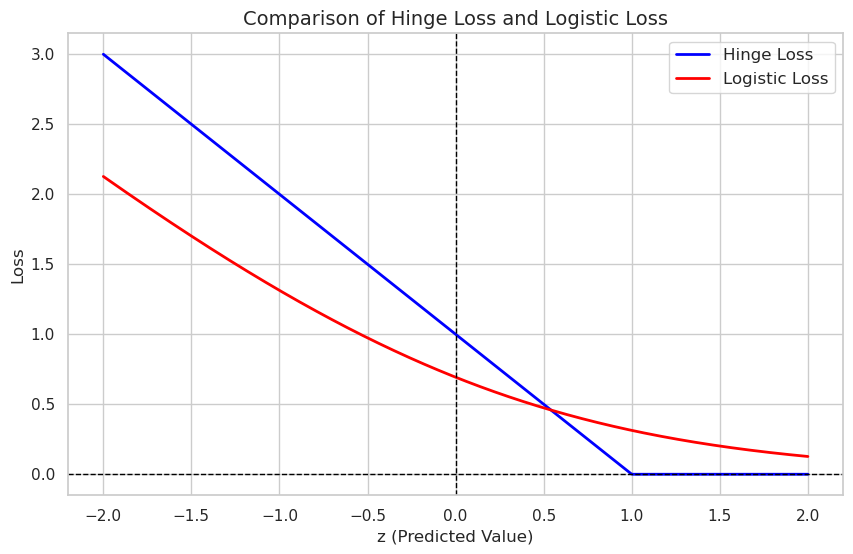

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# --- Loss Functions ---

def hinge_loss(y_true, y_pred):
    """
    Compute the hinge loss.
    """
    return np.mean(np.maximum(0, 1 - y_true * y_pred))


def logistic_loss(y_true, y_pred):
    """
    Compute the logistic loss.
    """
    return np.mean(np.log(1 + np.exp(-y_true * y_pred)))


def l2_regularization(w, lambda_):
    """
    Compute the L2 regularization term.
    """
    return lambda_ * np.sum(w ** 2)


def svm_loss(y_true, y_pred, w, lambda_):
    """
    Compute the total loss for SVM (hinge loss + regularization).
    """
    return hinge_loss(y_true, y_pred) + l2_regularization(w, lambda_)


def logistic_regression_loss(y_true, y_pred, w, lambda_):
    """
    Compute the total loss for logistic regression.
    """
    return logistic_loss(y_true, y_pred) + l2_regularization(w, lambda_)


# --- Data and Models ---

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
y = 2 * y - 1  # Convert labels to -1 and 1

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))

# Train Logistic Regression
logistic_model = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs')
logistic_model.fit(X_train, y_train)
logistic_pred = logistic_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, logistic_pred))

# Predictions for Custom Loss
svm_decision = svm_model.decision_function(X_test)
logistic_decision = logistic_model.decision_function(X_test)

# Example regularization parameter
lambda_ = 0.1

# Custom hinge loss
svm_loss_value = svm_loss(y_test, svm_decision, svm_model.coef_.flatten(), lambda_)
print("SVM Custom Loss:", svm_loss_value)

# Custom logistic loss
logistic_loss_value = logistic_regression_loss(
    y_test, logistic_decision, logistic_model.coef_.flatten(), lambda_
)
print("Logistic Regression Custom Loss:", logistic_loss_value)


# --- Visualization ---

# Generate predictions for graphing loss functions
z = np.linspace(-2, 2, 500)  # Range of predicted scores

# Calculate losses
hinge_values = np.maximum(0, 1 - z)
logistic_values = np.log(1 + np.exp(-z))

# Plot using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

plt.plot(z, hinge_values, label="Hinge Loss", color="blue", linewidth=2)
plt.plot(z, logistic_values, label="Logistic Loss", color="red", linewidth=2)
plt.axhline(y=0, color="black", linestyle="--", linewidth=1)
plt.axvline(x=0, color="black", linestyle="--", linewidth=1)

plt.title("Comparison of Hinge Loss and Logistic Loss", fontsize=14)
plt.xlabel("z (Predicted Value)", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.legend(fontsize=12)
plt.show()


## Multiclass SVMs

The support vector machine (SVM) is fundamentally a two-class classifier. However, real-world problems often involve **K > 2 classes**, requiring methods to extend SVMs for multiclass classification. Below, we discuss several approaches to achieve this.

---

## 1. One-Versus-The-Rest (OvR)
- **Concept**: Train $ K $ separate SVMs. Each SVM $ y_k(x) $ is trained with data from class $ C_k $ as positive examples and data from the remaining $ K-1 $ classes as negative examples.
- **Prediction**: Assign the class $ k $ that maximizes $ y_k(x) $:
  $$
  y(x) = \arg\max_k y_k(x)
  $$
- **Challenges**:
  1. **Inconsistent Results**: An input may be assigned to multiple classes simultaneously.
  2. **Imbalanced Training**: For $ K $ classes, 90% of training points are negative and only 10% are positive, leading to loss of symmetry.
  3. **Scale Issues**: The values $ y_k(x) $ may not have consistent scales.

- **Variants**:
  - **Lee et al. (2001)**: Modify targets so the positive class has $ +1 $ and the negative class has $ -\frac{1}{K-1} $.
  - **Weston and Watkins (1999)**: Train all $ K $ SVMs simultaneously with a single objective function to maximize margins between all classes, though this increases computational cost.

---

## 2. One-Versus-One (OvO)
- **Concept**: Train $ \frac{K(K-1)}{2} $ pairwise SVMs, one for each pair of classes.
- **Prediction**: Use a voting mechanism where each classifier votes for one class, and the class with the most votes is assigned.
- **Challenges**:
  1. **Ambiguities**: Multiple classes might have equal votes.
  2. **Complexity**: Increased training and testing time for large $ K $.

- **Optimization**:
  - **DAGSVM (Platt et al., 2000)**: Organize pairwise classifiers in a directed acyclic graph. For $ K $ classes, only $ K-1 $ classifiers are evaluated per test point.

---

## 3. Error-Correcting Output Codes (ECOC)
- **Concept**: Extend voting in OvO by using more general partitions of classes to train classifiers.
- **Representation**: Classes are represented as unique binary codes, and decoding methods provide robustness to errors and ambiguities in classifier outputs.

---

## 4. Single-Class SVMs
- **Purpose**: Solve an unsupervised problem related to density estimation by finding a smooth boundary enclosing regions of high density.
- **Methods**:
  1. **Schölkopf et al. (2001)**: Finds a hyperplane separating all but a fraction $ \nu $ of the data from the origin while maximizing the margin.
  2. **Tax and Duin (1999)**: Finds the smallest sphere in feature space that encloses all but a fraction $ \nu $ of the data points.
  
  For kernels $ k(x, x') $ depending only on $ x - x' $, both methods are equivalent.

---

## Practical Usage
- The **one-versus-the-rest approach** remains the most widely used due to its simplicity, despite its limitations.
- Multiclass classification with SVMs continues to be an open research area.

---


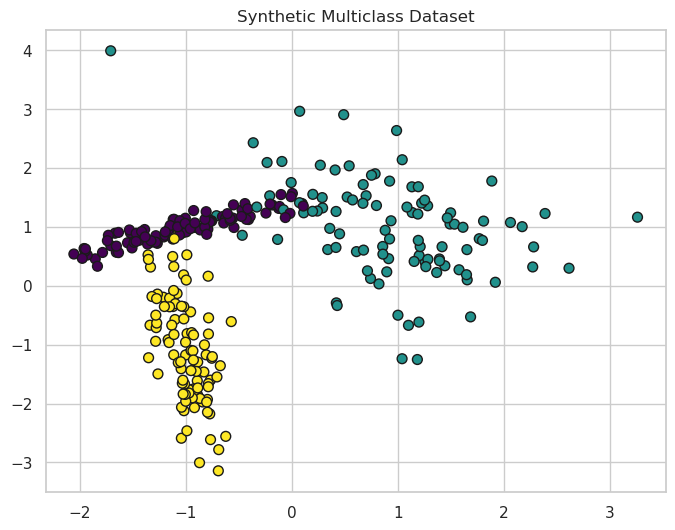

Training One-Versus-The-Rest (OvR) SVM...
One-Versus-The-Rest Accuracy: 0.91
Training One-Versus-One (OvO) SVM...
One-Versus-One Accuracy: 0.93


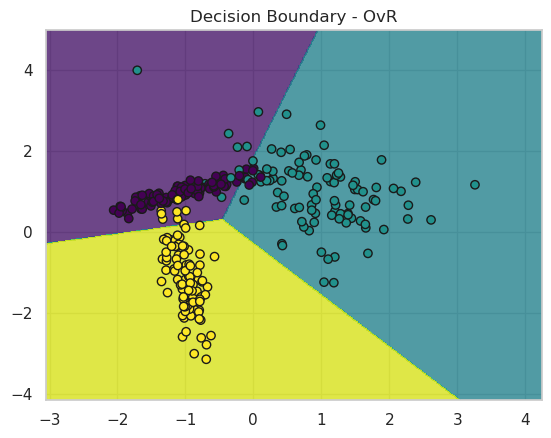

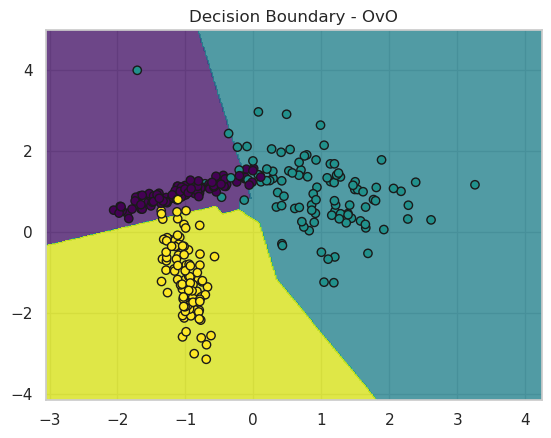

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import accuracy_score

# Generate synthetic dataset for multiclass classification
X, y = make_classification(
    n_samples=300, n_features=2, n_informative=2, n_redundant=0,
    n_classes=3, n_clusters_per_class=1, random_state=42
)

# Visualization of the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title("Synthetic Multiclass Dataset")
plt.show()

# One-Versus-The-Rest (OvR) approach
print("Training One-Versus-The-Rest (OvR) SVM...")
ovr_clf = OneVsRestClassifier(SVC(kernel='linear', probability=True))
ovr_clf.fit(X, y)
ovr_predictions = ovr_clf.predict(X)
print(f"One-Versus-The-Rest Accuracy: {accuracy_score(y, ovr_predictions):.2f}")

# One-Versus-One (OvO) approach
print("Training One-Versus-One (OvO) SVM...")
ovo_clf = OneVsOneClassifier(SVC(kernel='linear'))
ovo_clf.fit(X, y)
ovo_predictions = ovo_clf.predict(X)
print(f"One-Versus-One Accuracy: {accuracy_score(y, ovo_predictions):.2f}")

# Plot decision boundaries for visualization
def plot_decision_boundary(classifier, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='viridis')
    plt.title(title)
    plt.show()

# Visualize OvR
plot_decision_boundary(ovr_clf, X, y, "Decision Boundary - OvR")

# Visualize OvO
plot_decision_boundary(ovo_clf, X, y, "Decision Boundary - OvO")


In [4]:
import numpy as np

class LinearSVM:
    def __init__(self, learning_rate=0.01, lambda_param=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        # Gradient descent
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) + self.b) >= 1
                if condition:
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w - np.dot(x_i, y[idx]))
                    self.b -= self.learning_rate * y[idx]

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)


# Helper functions for OvR and OvO

def one_vs_rest(X, y, num_classes):
    classifiers = []
    for i in range(num_classes):
        # Create binary labels for class `i`
        y_binary = np.where(y == i, 1, -1)
        svm = LinearSVM()
        svm.fit(X, y_binary)
        classifiers.append(svm)
    return classifiers

def predict_ovr(classifiers, X):
    predictions = np.array([clf.predict(X) for clf in classifiers])
    # Select the class with the highest decision function value
    return np.argmax(predictions, axis=0)

def one_vs_one(X, y, num_classes):
    classifiers = {}
    for i in range(num_classes):
        for j in range(i + 1, num_classes):
            # Create binary labels for the two classes
            mask = (y == i) | (y == j)
            X_binary = X[mask]
            y_binary = y[mask]
            y_binary = np.where(y_binary == i, 1, -1)
            svm = LinearSVM()
            svm.fit(X_binary, y_binary)
            classifiers[(i, j)] = svm
    return classifiers

def predict_ovo(classifiers, X, num_classes):
    votes = np.zeros((X.shape[0], num_classes))
    for (i, j), clf in classifiers.items():
        predictions = clf.predict(X)
        votes[:, i] += (predictions == 1)
        votes[:, j] += (predictions == -1)
    # Return the class with the highest votes
    return np.argmax(votes, axis=1)


# Generating a synthetic dataset
def generate_dataset(n_samples, n_features, n_classes):
    np.random.seed(42)
    X = []
    y = []
    for class_idx in range(n_classes):
        X_class = np.random.randn(n_samples // n_classes, n_features) + class_idx * 3
        y_class = np.full(n_samples // n_classes, class_idx)
        X.append(X_class)
        y.append(y_class)
    return np.vstack(X), np.hstack(y)


# Main function
if __name__ == "__main__":
    # Dataset parameters
    n_samples = 300
    n_features = 2
    n_classes = 3

    # Generate synthetic data
    X, y = generate_dataset(n_samples, n_features, n_classes)

    # One-Versus-Rest (OvR)
    ovr_classifiers = one_vs_rest(X, y, n_classes)
    ovr_predictions = predict_ovr(ovr_classifiers, X)
    print("OvR Predictions:", ovr_predictions)
    print("OvR Accuracy:", np.mean(ovr_predictions == y))

    # One-Versus-One (OvO)
    ovo_classifiers = one_vs_one(X, y, n_classes)
    ovo_predictions = predict_ovo(ovo_classifiers, X, n_classes)
    print("OvO Predictions:", ovo_predictions)
    print("OvO Accuracy:", np.mean(ovo_predictions == y))


OvR Predictions: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
OvR Accuracy: 0.33666666666666667
OvO Predictions: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2

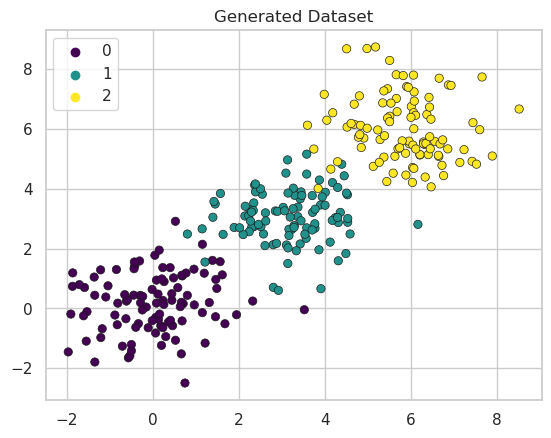

One-Versus-Rest Accuracy: 0.58


In [5]:
import random
import math
import seaborn as sns
import matplotlib.pyplot as plt

# Helper Functions
def dot_product(w, x):
    """Compute the dot product between two vectors."""
    return sum(w_i * x_i for w_i, x_i in zip(w, x))

def vector_add(v1, v2):
    """Add two vectors."""
    return [a + b for a, b in zip(v1, v2)]

def vector_subtract(v1, v2):
    """Subtract one vector from another."""
    return [a - b for a, b in zip(v1, v2)]

def scalar_multiply(scalar, v):
    """Multiply a vector by a scalar."""
    return [scalar * x for x in v]

# Linear SVM Class
class LinearSVM:
    def __init__(self, learning_rate=0.01, lambda_param=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = len(X), len(X[0])
        self.w = [0] * n_features
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                if y[idx] * (dot_product(self.w, x_i) + self.b) >= 1:
                    # Correctly classified
                    self.w = vector_subtract(self.w, scalar_multiply(2 * self.lambda_param, self.w))
                else:
                    # Misclassified
                    self.w = vector_subtract(self.w, scalar_multiply(2 * self.lambda_param, self.w))
                    self.w = vector_add(self.w, scalar_multiply(y[idx], x_i))
                    self.b -= self.learning_rate * y[idx]

    def predict(self, X):
        return [1 if dot_product(self.w, x) + self.b >= 0 else -1 for x in X]

# Helper Functions for Multiclass SVM
def one_vs_rest(X, y, num_classes):
    classifiers = []
    for i in range(num_classes):
        # Create binary labels for class `i`
        y_binary = [1 if label == i else -1 for label in y]
        svm = LinearSVM()
        svm.fit(X, y_binary)
        classifiers.append(svm)
    return classifiers

def predict_ovr(classifiers, X):
    # Predict with all classifiers and return the class with the highest score
    predictions = [[clf.predict([x])[0] for clf in classifiers] for x in X]
    return [pred.index(max(pred)) for pred in predictions]

# Generate Dataset
def generate_dataset(n_samples, n_classes):
    """Generates a toy dataset."""
    X = []
    y = []
    for class_idx in range(n_classes):
        for _ in range(n_samples // n_classes):
            X.append([
                random.gauss(class_idx * 3, 1),
                random.gauss(class_idx * 3, 1)
            ])
            y.append(class_idx)
    return X, y

# Plot Dataset
def plot_dataset(X, y):
    """Visualizes the dataset."""
    X1, X2 = zip(*X)
    sns.scatterplot(x=X1, y=X2, hue=y, palette="viridis", edgecolor="k")
    plt.title("Generated Dataset")
    plt.show()

# Main Program
if __name__ == "__main__":
    # Generate data
    n_samples = 300
    n_classes = 3
    X, y = generate_dataset(n_samples, n_classes)

    # Plot dataset
    plot_dataset(X, y)

    # One-Versus-Rest SVM
    ovr_classifiers = one_vs_rest(X, y, n_classes)
    ovr_predictions = predict_ovr(ovr_classifiers, X)

    # Accuracy
    accuracy = sum(1 for true, pred in zip(y, ovr_predictions) if true == pred) / len(y)
    print(f"One-Versus-Rest Accuracy: {accuracy:.2f}")


## SVMs for Regression

Support Vector Machines (SVMs) can also be extended to regression problems while preserving the property of sparseness. In simple linear regression, we minimize a regularized error function given by:

$$
\frac{1}{2} \lambda \sum_{n=1}^N (y_n - t_n)^2 + \frac{1}{2} \|w\|^2.
$$

To achieve sparsity, the quadratic error function is replaced by an $\epsilon$-insensitive error function (Vapnik, 1995), which introduces a margin of tolerance, $\epsilon > 0$. The $\epsilon$-insensitive error function is defined as:

$$
E(y(x) - t) =
\begin{cases}
0, & \text{if } |y(x) - t| < \epsilon, \\
|y(x) - t| - \epsilon, & \text{otherwise.}
\end{cases}
$$

This error function, illustrated in the figure below, has a linear cost associated with errors outside the $\epsilon$-insensitive region.

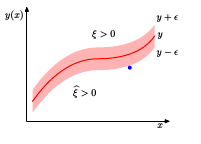

Fig.7 Illustration of SVM regression, showing the regression curve together with the - insensitive ‘tube’. Also shown are exam- ples of the slack variables ξ and b ξ. Points above the -tube have ξ > 0 and b ξ = 0, points below the -tube have ξ = 0 and b ξ > 0, and points inside the -tube have ξ =b ξ = 0.

## Regularized Error Function

The regularized error function for SVM regression is:

$$
\frac{1}{2} C \sum_{n=1}^N E(y(x_n) - t_n) + \frac{1}{2} \|w\|^2,
$$

where $C$ is a regularization parameter.

## Slack Variables

To handle points outside the $\epsilon$-tube, we introduce slack variables $\xi_n \geq 0$ and $\xi_n^* \geq 0$, where:
- $\xi_n > 0$: corresponds to a point where $t_n > y(x_n) + \epsilon$,
- $\xi_n^* > 0$: corresponds to a point where $t_n < y(x_n) - \epsilon$.

### Constraints
For points inside the $\epsilon$-tube:

$$
y_n - \epsilon \leq t_n \leq y_n + \epsilon.
$$

For points outside the tube:

$$
t_n \geq y(x_n) + \epsilon + \xi_n,
$$
$$
t_n \leq y(x_n) - \epsilon - \xi_n^*.
$$

These slack variables allow points to lie outside the $\epsilon$-tube, maintaining flexibility.

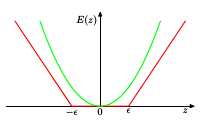

Fig.6 Plot of an -insensitive error function (in red) in which the error increases lin- early with distance beyond the insensitive region. Also shown for comparison is the quadratic error function (in green).

## Optimization Problem

The optimization problem can now be expressed as minimizing:

$$
\frac{1}{2} C \sum_{n=1}^N (\xi_n + \xi_n^*) + \frac{1}{2} \|w\|^2,
$$

subject to:
- $\xi_n \geq 0, \xi_n^* \geq 0$,
- $t_n \geq y(x_n) + \epsilon + \xi_n$,
- $t_n \leq y(x_n) - \epsilon - \xi_n^*$.

This is illustrated in the following figure:

### Illustration

Points within the $\epsilon$-tube have $\xi = \xi^* = 0$. Points above the tube have $\xi > 0, \xi^* = 0$, and points below have $\xi = 0, \xi^* > 0$.

## Lagrangian Formulation

The Lagrangian for this problem is:

$$
L = \frac{1}{2} C \sum_{n=1}^N (\xi_n + \xi_n^*) + \frac{1}{2} \|w\|^2
- \sum_{n=1}^N (\mu_n \xi_n + \mu_n^* \xi_n^*)
- \sum_{n=1}^N \alpha_n (\epsilon + \xi_n + y_n - t_n)
- \sum_{n=1}^N \alpha_n^* (\epsilon + \xi_n^* - y_n + t_n),
$$

where $\alpha_n, \alpha_n^*, \mu_n, \mu_n^* \geq 0$ are Lagrange multipliers.

### Optimality Conditions

Taking derivatives of the Lagrangian with respect to \(w, b, \xi_n, \xi_n^*\) and setting them to zero yields:

1. $$
\frac{\partial L}{\partial w} = 0 \implies w = \sum_{n=1}^N (\alpha_n - \alpha_n^*) \phi(x_n),
$$
2. $$
\frac{\partial L}{\partial b} = 0 \implies \sum_{n=1}^N (\alpha_n - \alpha_n^*) = 0,
$$
3. $$
\frac{\partial L}{\partial \xi_n} = 0 \implies \alpha_n + \mu_n = C,
$$
4. $$
\frac{\partial L}{\partial \xi_n^*} = 0 \implies \alpha_n^* + \mu_n^* = C.
$$

These conditions lead to the dual problem formulation.

## Dual Problem

By substituting $y(x) = \sum_{n=1}^N (\alpha_n - \alpha_n^*) \phi(x_n) + b$ into the Lagrangian, we derive the dual problem, which involves maximizing:

---



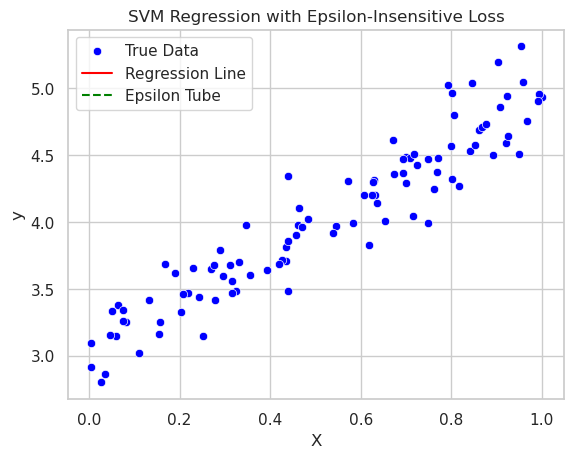

In [6]:
import random
import math
import seaborn as sns
import matplotlib.pyplot as plt

class SVMRegression:
    def __init__(self, epsilon=0.1, C=1.0, learning_rate=0.001, n_iters=1000):
        self.epsilon = epsilon
        self.C = C
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.w = None
        self.b = 0

    def fit(self, X, y):
        n_samples, n_features = len(X), len(X[0])
        self.w = [0] * n_features
        self.b = 0
        slack = [0] * n_samples  # slack variables ξ and ξ*

        for _ in range(self.n_iters):
            for idx in range(n_samples):
                y_pred = self._predict_point(X[idx])

                # Slack variables for points outside the epsilon-tube
                if y[idx] > y_pred + self.epsilon:
                    slack[idx] = y[idx] - (y_pred + self.epsilon)
                elif y[idx] < y_pred - self.epsilon:
                    slack[idx] = (y_pred - self.epsilon) - y[idx]
                else:
                    slack[idx] = 0  # Inside the epsilon-tube

                # Update weights and bias
                gradient_w = [-2 * self.C * (y_pred - y[idx]) * x_i for x_i in X[idx]]
                self.w = [w_i - self.learning_rate * grad for w_i, grad in zip(self.w, gradient_w)]
                self.b -= self.learning_rate * -2 * self.C * (y_pred - y[idx])

    def _predict_point(self, x):
        return sum(w_i * x_i for w_i, x_i in zip(self.w, x)) + self.b

    def predict(self, X):
        return [self._predict_point(x) for x in X]

# Generate synthetic regression data
def generate_regression_data(n_samples=100, noise=0.1):
    X = [[random.uniform(0, 1)] for _ in range(n_samples)]
    y = [2 * x[0] + 3 + random.gauss(0, noise) for x in X]  # y = 2x + 3 + noise
    return X, y

# Plot regression results
def plot_regression(X, y, y_pred, epsilon):
    X_flat = [x[0] for x in X]
    sns.scatterplot(x=X_flat, y=y, label="True Data", color="blue")
    sns.lineplot(x=X_flat, y=y_pred, label="Regression Line", color="red")
    sns.lineplot(x=X_flat, y=[yp + epsilon for yp in y_pred], label="Epsilon Tube", color="green", linestyle="--")
    sns.lineplot(x=X_flat, y=[yp - epsilon for yp in y_pred], color="green", linestyle="--")
    plt.title("SVM Regression with Epsilon-Insensitive Loss")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.show()

# Main Program
if __name__ == "__main__":
    # Generate data
    X, y = generate_regression_data(n_samples=100, noise=0.2)

    # Fit SVM regression
    epsilon = 0.2
    model = SVMRegression(epsilon=epsilon, C=1.0, learning_rate=0.01, n_iters=1000)
    model.fit(X, y)

    # Predict on training data
    y_pred = model.predict(X)

    # Plot results
    plot_regression(X, y, y_pred, epsilon)


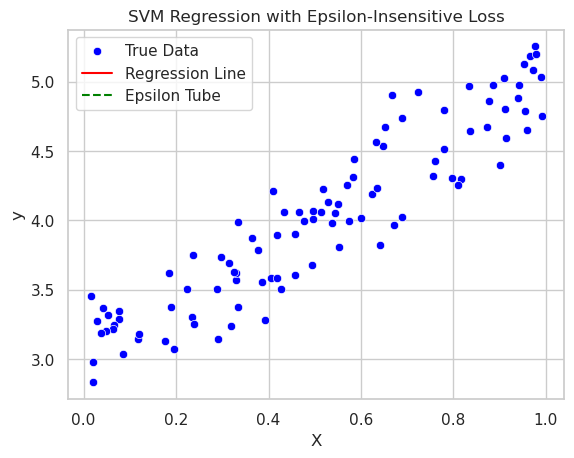

In [7]:
import random
import math
import seaborn as sns
import matplotlib.pyplot as plt

class SVMRegression:
    def __init__(self, epsilon=0.1, C=1.0, learning_rate=0.001, n_iters=1000):
        self.epsilon = epsilon
        self.C = C
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.w = None
        self.b = 0

    def fit(self, X, y):
        n_samples, n_features = len(X), len(X[0])
        self.w = [0] * n_features
        self.b = 0
        slack = [0] * n_samples  # slack variables ξ and ξ*

        for _ in range(self.n_iters):
            for idx in range(n_samples):
                y_pred = self._predict_point(X[idx])

                # Slack variables for points outside the epsilon-tube
                if y[idx] > y_pred + self.epsilon:
                    slack[idx] = y[idx] - (y_pred + self.epsilon)
                elif y[idx] < y_pred - self.epsilon:
                    slack[idx] = (y_pred - self.epsilon) - y[idx]
                else:
                    slack[idx] = 0  # Inside the epsilon-tube

                # Update weights and bias
                gradient_w = [-2 * self.C * (y_pred - y[idx]) * x_i for x_i in X[idx]]
                self.w = [w_i - self.learning_rate * grad for w_i, grad in zip(self.w, gradient_w)]
                self.b -= self.learning_rate * -2 * self.C * (y_pred - y[idx])

    def _predict_point(self, x):
        return sum(w_i * x_i for w_i, x_i in zip(self.w, x)) + self.b

    def predict(self, X):
        return [self._predict_point(x) for x in X]

# Generate synthetic regression data
def generate_regression_data(n_samples=100, noise=0.1):
    X = [[random.uniform(0, 1)] for _ in range(n_samples)]
    y = [2 * x[0] + 3 + random.gauss(0, noise) for x in X]  # y = 2x + 3 + noise
    return X, y

# Plot regression results
def plot_regression(X, y, y_pred, epsilon):
    X_flat = [x[0] for x in X]
    sns.scatterplot(x=X_flat, y=y, label="True Data", color="blue")
    sns.lineplot(x=X_flat, y=y_pred, label="Regression Line", color="red")
    sns.lineplot(x=X_flat, y=[yp + epsilon for yp in y_pred], label="Epsilon Tube", color="green", linestyle="--")
    sns.lineplot(x=X_flat, y=[yp - epsilon for yp in y_pred], color="green", linestyle="--")
    plt.title("SVM Regression with Epsilon-Insensitive Loss")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.show()

# Main Program
if __name__ == "__main__":
    # Generate data
    X, y = generate_regression_data(n_samples=100, noise=0.2)

    # Fit SVM regression
    epsilon = 0.2
    model = SVMRegression(epsilon=epsilon, C=1.0, learning_rate=0.01, n_iters=1000)
    model.fit(X, y)

    # Predict on training data
    y_pred = model.predict(X)

    # Plot results
    plot_regression(X, y, y_pred, epsilon)


In [8]:
class SVMRegression:
    def __init__(self, epsilon=0.1, C=1.0, learning_rate=0.001, n_iters=1000):
        self.epsilon = epsilon  # Epsilon-insensitive margin
        self.C = C              # Regularization parameter
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.w = None           # Weight vector
        self.b = 0              # Bias term

    def fit(self, X, y):
        # Initialize weights and bias
        n_samples, n_features = len(X), len(X[0])
        self.w = [0] * n_features
        self.b = 0

        # Perform gradient descent
        for _ in range(self.n_iters):
            for idx in range(n_samples):
                # Compute the prediction
                y_pred = sum(self.w[j] * X[idx][j] for j in range(n_features)) + self.b

                # Compute the loss outside the epsilon-tube
                error = y_pred - y[idx]
                if abs(error) <= self.epsilon:
                    continue  # No penalty for predictions within the epsilon-tube

                # Calculate gradients for weights and bias
                gradient_w = [self.C * error * X[idx][j] for j in range(n_features)]
                self.w = [self.w[j] - self.learning_rate * grad for j, grad in enumerate(gradient_w)]
                self.b -= self.learning_rate * self.C * error

    def predict(self, X):
        # Predict output for all input samples
        return [sum(self.w[j] * x[j] for j in range(len(self.w))) + self.b for x in X]

# Generate synthetic regression data without external libraries
def generate_regression_data(n_samples=100, noise=0.1):
    import random
    X = [[random.uniform(0, 1)] for _ in range(n_samples)]
    y = [2 * x[0] + 3 + random.uniform(-noise, noise) for x in X]  # Linear: y = 2x + 3 + noise
    return X, y

# Plot regression results without external libraries
def plot_regression(X, y, y_pred, epsilon):
    X_flat = [x[0] for x in X]

    # Prepare output strings for visualization
    print("X\t\tTrue Y\t\tPredicted Y")
    print("------------------------------------")
    for i in range(len(X)):
        print(f"{X_flat[i]:.2f}\t\t{y[i]:.2f}\t\t{y_pred[i]:.2f}")

    print("\nEpsilon-Tube:")
    print(f"Upper Bound: Predicted Y + {epsilon}")
    print(f"Lower Bound: Predicted Y - {epsilon}")

# Main Program
if __name__ == "__main__":
    # Generate synthetic data
    X, y = generate_regression_data(n_samples=20, noise=0.2)

    # Fit SVM regression model
    epsilon = 0.2
    model = SVMRegression(epsilon=epsilon, C=1.0, learning_rate=0.01, n_iters=500)
    model.fit(X, y)

    # Predict on training data
    y_pred = model.predict(X)

    # Output results
    plot_regression(X, y, y_pred, epsilon)


X		True Y		Predicted Y
------------------------------------
0.19		3.54		3.39
0.47		3.97		3.90
0.36		3.76		3.70
0.87		4.67		4.64
0.68		4.40		4.30
0.96		5.00		4.80
0.24		3.53		3.48
0.55		4.16		4.05
0.89		4.79		4.68
0.16		3.46		3.33
0.27		3.56		3.53
0.55		4.12		4.05
0.31		3.69		3.62
0.83		4.53		4.56
0.94		4.85		4.78
0.27		3.47		3.54
0.95		4.91		4.79
0.78		4.62		4.48
0.27		3.71		3.53
0.77		4.45		4.46

Epsilon-Tube:
Upper Bound: Predicted Y + 0.2
Lower Bound: Predicted Y - 0.2


# **Support Vector Machines for Regression**

## **Introduction**

The $\nu$-SVM regression extends the support vector machine framework to regression problems. It introduces a parameter $\nu$ that controls:

1. The fraction of data points allowed to fall outside the $\epsilon$-tube.
2. A lower bound on the fraction of support vectors.

---

## **Dual Optimization Objective**

The $\nu$-SVM for regression optimizes the following objective function:

$$
L(a, a') = -\frac{1}{2} \sum_{n=1}^N \sum_{m=1}^N (a_n - a'_n)(a_m - a'_m) k(x_n, x_m)
+ \sum_{n=1}^N (a_n - a'_n)t_n
$$

---

## **Constraints**

The optimization is subject to the following constraints:

1. Box constraints for Lagrange multipliers:
   $$
   0 \leq a_n \leq \frac{C}{N}, \quad 0 \leq a'_n \leq \frac{C}{N}
   $$
2. Balance constraint for multipliers:
   $$
   \sum_{n=1}^N (a_n - a'_n) = 0
   $$
3. Fraction constraint:
   $$
   \sum_{n=1}^N (a_n + a'_n) \leq \nu C
   $$

---

## **Prediction Function**

The predicted value for a new input $x$ is given by:

$$
y(x) = \sum_{n=1}^N (a_n - a'_n) k(x, x_n) + b
$$

---

## **Kernel Function**

The kernel function maps input data into a higher-dimensional space:

$$
k(x, x') = \phi(x)^T \phi(x')
$$

---

## **Bias Term**

The bias term $b$ is calculated using support vectors. For a support vector $x_n$ with $0 < a_n < \frac{C}{N}$, the bias is computed as:

$$
b = t_n - \epsilon - \sum_{m=1}^N (a_m - a'_m)k(x_n, x_m)
$$

---

## **Karush-Kuhn-Tucker (KKT) Conditions**

The KKT conditions ensure optimality of the solution. They include:

1. For $a_n$:
   $$
   a_n (\epsilon + \xi_n + y_n - t_n) = 0
   $$
2. For $a'_n$:
   $$
   a'_n (\epsilon + \xi'_n - y_n + t_n) = 0
   $$
3. Complementary slackness:
   $$
   (C - a_n)\xi_n = 0, \quad (C - a'_n)\xi'_n = 0
   $$

---

## **Sparsity**

Support vectors are the data points that contribute to the predictions $y(x)$. These points either lie on the boundary of the $\epsilon$-tube or outside it. Data points within the $\epsilon$-tube have $a_n = a'_n = 0$.

---

## **Algorithm Steps**

1. **Kernel Selection**:
   - Choose a kernel $k(x, x')$ (e.g., linear, polynomial, Gaussian).
2. **Formulate Dual Problem**:
   - Define the objective $L(a, a')$ with constraints.
3. **Solve for Lagrange Multipliers**:
   - Use optimization methods to find $a_n, a'_n$.
4. **Compute Bias Term**:
   - Use support vectors to calculate $b$.
5. **Prediction**:
   - Use $y(x)$ for regression.

---

## **Visualization**

- **Regression Curve**: The predicted regression line.
- **$\epsilon$-Insensitive Tube**: A shaded region around the regression line.
- **Support Vectors**: Data points lying outside or on the boundary of the tube.

---

## **Conclusion**

The $\nu$-SVM regression framework provides a sparse solution for regression problems, maintaining the ability to generalize effectively.



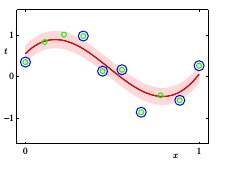

Fig.8 Illustration of the ν-SVM for re- gression applied to the sinusoidal synthetic data set using Gaussian kernels. The predicted regression curve is shown by the red line, and the -insensitive tube corresponds to the shaded region. Also, the data points are shown in green, and those with support vectors are indicated by blue circles.


In [9]:
# Basic implementation of ν-SVM for regression
class NuSVMRegression:
    def __init__(self, kernel='linear', C=1.0, epsilon=0.1, nu=0.1):
        self.kernel_type = kernel
        self.C = C
        self.epsilon = epsilon
        self.nu = nu
        self.a = []
        self.a_prime = []
        self.support_vectors = []
        self.support_vector_labels = []
        self.b = 0

    def linear_kernel(self, x1, x2):
        return sum(x1[i] * x2[i] for i in range(len(x1)))

    def rbf_kernel(self, x1, x2, gamma=1.0):
        return sum((x1[i] - x2[i]) ** 2 for i in range(len(x1))) * (-gamma)

    def kernel(self, x1, x2):
        if self.kernel_type == 'linear':
            return self.linear_kernel(x1, x2)
        elif self.kernel_type == 'rbf':
            return self.rbf_kernel(x1, x2)
        else:
            raise ValueError(f"Unknown kernel: {self.kernel_type}")

    def fit(self, X, y):
        n = len(X)
        self.a = [0] * n
        self.a_prime = [0] * n

        # Dual optimization problem
        def L_dual(a, a_prime):
            result = 0
            for i in range(n):
                for j in range(n):
                    result -= 0.5 * (a[i] - a_prime[i]) * (a[j] - a_prime[j]) * self.kernel(X[i], X[j])
            result += sum((a[i] - a_prime[i]) * y[i] for i in range(n))
            return result

        # Initialize parameters (simple gradient ascent optimization)
        for step in range(100):  # Number of optimization steps
            for i in range(n):
                grad = 1 - sum(
                    (self.a[j] - self.a_prime[j]) * self.kernel(X[i], X[j])
                    for j in range(n)
                )
                self.a[i] = min(max(self.a[i] + 0.01 * grad, 0), self.C / n)
                self.a_prime[i] = min(max(self.a_prime[i] - 0.01 * grad, 0), self.C / n)

        # Compute b using support vectors
        for i in range(n):
            if 0 < self.a[i] < self.C / n:
                self.b = y[i] - sum(
                    (self.a[j] - self.a_prime[j]) * self.kernel(X[i], X[j])
                    for j in range(n)
                )
                break

        # Store support vectors
        self.support_vectors = [(X[i], y[i]) for i in range(n) if self.a[i] > 0 or self.a_prime[i] > 0]

    def predict(self, X):
        results = []
        for x in X:
            result = sum(
                (self.a[i] - self.a_prime[i]) * self.kernel(x, sv[0])
                for i, sv in enumerate(self.support_vectors)
            ) + self.b
            results.append(result)
        return results


# Example Usage
if __name__ == "__main__":
    # Synthetic data
    X = [[i] for i in range(-10, 11)]  # Features
    y = [2 * i[0] + 3 for i in X]      # Targets (linear relationship)

    # Train ν-SVM regression
    svm = NuSVMRegression(kernel='linear', C=1.0, epsilon=0.1, nu=0.1)
    svm.fit(X, y)

    # Predict on new data
    X_test = [[i] for i in range(-15, 16)]
    predictions = svm.predict(X_test)

    # Display results
    print("Predictions:")
    for i, pred in zip(X_test, predictions):
        print(f"Input: {i}, Prediction: {pred}")


Predictions:
Input: [-15], Prediction: 8.881784197001252e-16
Input: [-14], Prediction: 1.7763568394002505e-15
Input: [-13], Prediction: -1.7763568394002505e-15
Input: [-12], Prediction: 0.0
Input: [-11], Prediction: -1.7763568394002505e-15
Input: [-10], Prediction: 0.0
Input: [-9], Prediction: 0.0
Input: [-8], Prediction: -2.220446049250313e-15
Input: [-7], Prediction: 8.881784197001252e-16
Input: [-6], Prediction: 0.0
Input: [-5], Prediction: 0.0
Input: [-4], Prediction: -1.1102230246251565e-15
Input: [-3], Prediction: 0.0
Input: [-2], Prediction: -5.551115123125783e-16
Input: [-1], Prediction: -2.7755575615628914e-16
Input: [0], Prediction: 0.0
Input: [1], Prediction: 2.7755575615628914e-16
Input: [2], Prediction: 5.551115123125783e-16
Input: [3], Prediction: 0.0
Input: [4], Prediction: 1.1102230246251565e-15
Input: [5], Prediction: 0.0
Input: [6], Prediction: 0.0
Input: [7], Prediction: -8.881784197001252e-16
Input: [8], Prediction: 2.220446049250313e-15
Input: [9], Prediction: 0.0


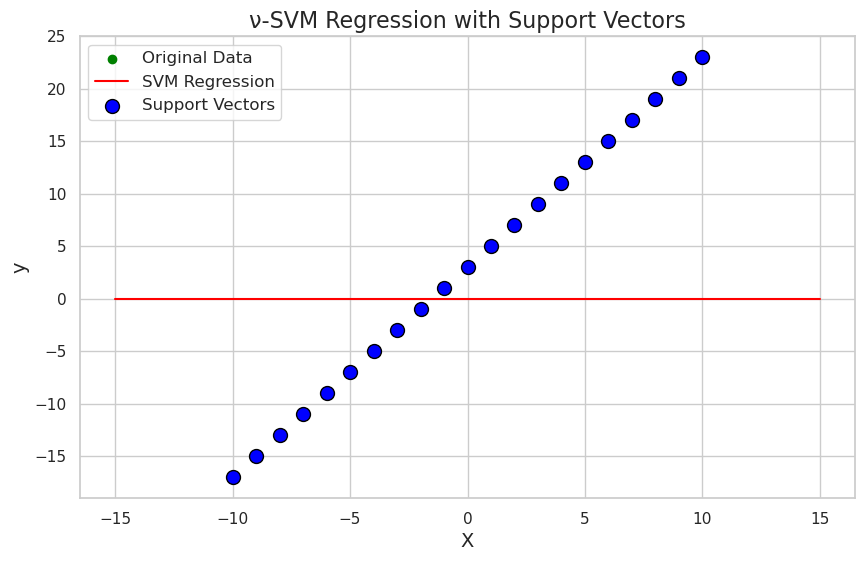

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Basic implementation of ν-SVM for regression
class NuSVMRegression:
    def __init__(self, kernel='linear', C=1.0, epsilon=0.1, nu=0.1):
        self.kernel_type = kernel
        self.C = C
        self.epsilon = epsilon
        self.nu = nu
        self.a = []
        self.a_prime = []
        self.support_vectors = []
        self.support_vector_labels = []
        self.b = 0

    def linear_kernel(self, x1, x2):
        return sum(x1[i] * x2[i] for i in range(len(x1)))

    def rbf_kernel(self, x1, x2, gamma=1.0):
        return sum((x1[i] - x2[i]) ** 2 for i in range(len(x1))) * (-gamma)

    def kernel(self, x1, x2):
        if self.kernel_type == 'linear':
            return self.linear_kernel(x1, x2)
        elif self.kernel_type == 'rbf':
            return self.rbf_kernel(x1, x2)
        else:
            raise ValueError(f"Unknown kernel: {self.kernel_type}")

    def fit(self, X, y):
        n = len(X)
        self.a = [0] * n
        self.a_prime = [0] * n

        # Dual optimization problem
        def L_dual(a, a_prime):
            result = 0
            for i in range(n):
                for j in range(n):
                    result -= 0.5 * (a[i] - a_prime[i]) * (a[j] - a_prime[j]) * self.kernel(X[i], X[j])
            result += sum((a[i] - a_prime[i]) * y[i] for i in range(n))
            return result

        # Initialize parameters (simple gradient ascent optimization)
        for step in range(100):  # Number of optimization steps
            for i in range(n):
                grad = 1 - sum(
                    (self.a[j] - self.a_prime[j]) * self.kernel(X[i], X[j])
                    for j in range(n)
                )
                self.a[i] = min(max(self.a[i] + 0.01 * grad, 0), self.C / n)
                self.a_prime[i] = min(max(self.a_prime[i] - 0.01 * grad, 0), self.C / n)

        # Compute b using support vectors
        for i in range(n):
            if 0 < self.a[i] < self.C / n:
                self.b = y[i] - sum(
                    (self.a[j] - self.a_prime[j]) * self.kernel(X[i], X[j])
                    for j in range(n)
                )
                break

        # Store support vectors
        self.support_vectors = [(X[i], y[i]) for i in range(n) if self.a[i] > 0 or self.a_prime[i] > 0]

    def predict(self, X):
        results = []
        for x in X:
            result = sum(
                (self.a[i] - self.a_prime[i]) * self.kernel(x, sv[0])
                for i, sv in enumerate(self.support_vectors)
            ) + self.b
            results.append(result)
        return results


# Example Usage
if __name__ == "__main__":
    # Synthetic data
    X = [[i] for i in range(-10, 11)]  # Features
    y = [2 * i[0] + 3 for i in X]      # Targets (linear relationship)

    # Train ν-SVM regression
    svm = NuSVMRegression(kernel='linear', C=1.0, epsilon=0.1, nu=0.1)
    svm.fit(X, y)

    # Predict on new data
    X_test = [[i] for i in range(-15, 16)]
    predictions = svm.predict(X_test)

    # Plot the original data and predicted regression curve
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))

    # Plot original data points
    plt.scatter([i[0] for i in X], y, color='green', label="Original Data", zorder=5)

    # Plot predicted regression curve
    plt.plot([i[0] for i in X_test], predictions, color='red', label="SVM Regression", zorder=3)

    # Plot support vectors
    support_vector_x = [sv[0][0] for sv in svm.support_vectors]
    support_vector_y = [sv[1] for sv in svm.support_vectors]
    plt.scatter(support_vector_x, support_vector_y, color='blue', s=100, label="Support Vectors", edgecolors='black', zorder=10)

    # Customize the plot
    plt.title("ν-SVM Regression with Support Vectors", fontsize=16)
    plt.xlabel("X", fontsize=14)
    plt.ylabel("y", fontsize=14)
    plt.legend(loc='upper left', fontsize=12)

    # Show the plot
    plt.show()


ValueError: All arrays must be of the same length

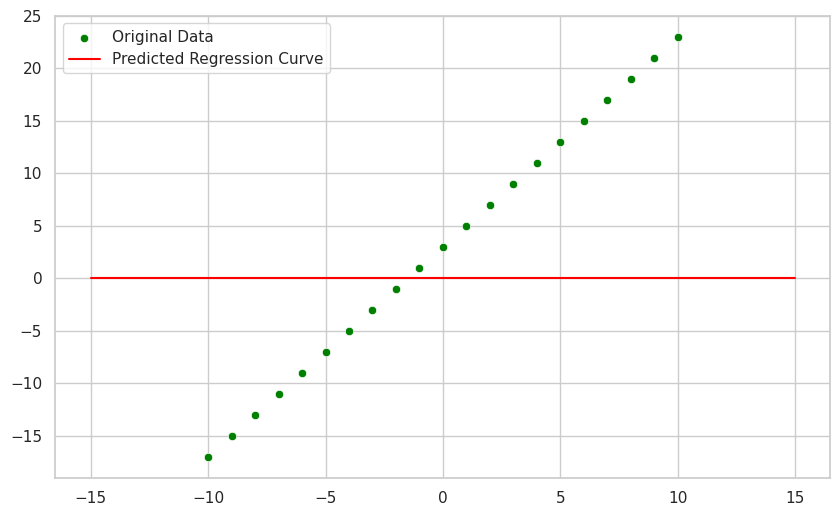

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Synthetic data
X = [[i] for i in range(-10, 11)]  # Features
y = [2 * i[0] + 3 for i in X]      # Targets (linear relationship)

# Train ν-SVM regression
svm = NuSVMRegression(kernel='linear', C=1.0, epsilon=0.1, nu=0.1)
svm.fit(X, y)

# Predict on new data
X_test = [[i] for i in range(-15, 16)]
predictions = svm.predict(X_test)

# Convert data for plotting
X_plot = [i[0] for i in X]
y_plot = y

X_test_plot = [i[0] for i in X_test]
y_pred_plot = predictions

# Identify support vectors
support_vectors = [sv[0][0] for sv in svm.support_vectors]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot original data points
sns.scatterplot(x=X_plot, y=y_plot, color='green', label='Original Data')

# Plot predicted regression curve
sns.lineplot(x=X_test_plot, y=y_pred_plot, color='red', label='Predicted Regression Curve')

# Highlight support vectors
sns.scatterplot(x=support_vectors, y=[y[i] for i in range(len(X)) if X[i] in support_vectors], 
                color='blue', s=100, marker='o', label='Support Vectors')

plt.title('ν-SVM Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

# Show the plot
plt.show()


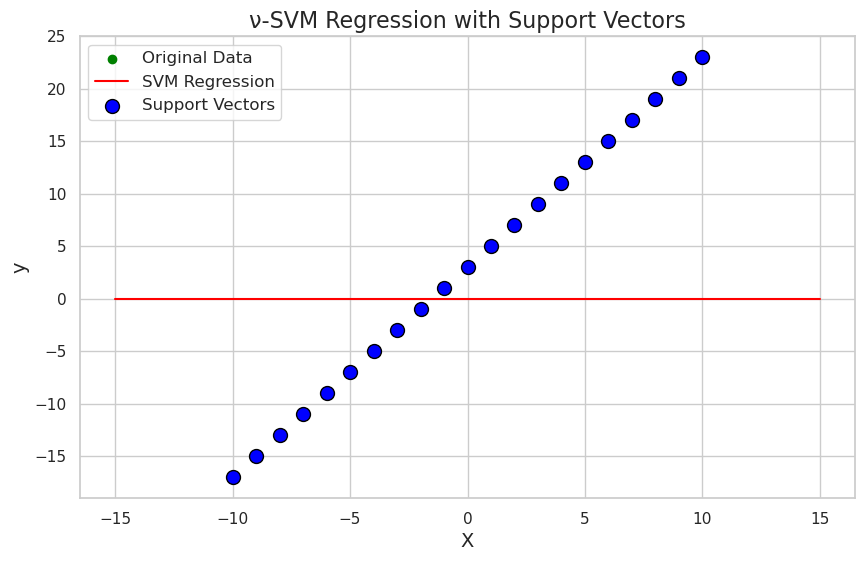

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Basic implementation of ν-SVM for regression
class NuSVMRegression:
    def __init__(self, kernel='linear', C=1.0, epsilon=0.1, nu=0.1):
        self.kernel_type = kernel
        self.C = C
        self.epsilon = epsilon
        self.nu = nu
        self.a = []
        self.a_prime = []
        self.support_vectors = []
        self.support_vector_labels = []
        self.b = 0

    def linear_kernel(self, x1, x2):
        return sum(x1[i] * x2[i] for i in range(len(x1)))

    def rbf_kernel(self, x1, x2, gamma=1.0):
        return sum((x1[i] - x2[i]) ** 2 for i in range(len(x1))) * (-gamma)

    def kernel(self, x1, x2):
        if self.kernel_type == 'linear':
            return self.linear_kernel(x1, x2)
        elif self.kernel_type == 'rbf':
            return self.rbf_kernel(x1, x2)
        else:
            raise ValueError(f"Unknown kernel: {self.kernel_type}")

    def fit(self, X, y):
        n = len(X)
        self.a = [0] * n
        self.a_prime = [0] * n

        # Dual optimization problem
        def L_dual(a, a_prime):
            result = 0
            for i in range(n):
                for j in range(n):
                    result -= 0.5 * (a[i] - a_prime[i]) * (a[j] - a_prime[j]) * self.kernel(X[i], X[j])
            result += sum((a[i] - a_prime[i]) * y[i] for i in range(n))
            return result

        # Initialize parameters (simple gradient ascent optimization)
        for step in range(100):  # Number of optimization steps
            for i in range(n):
                grad = 1 - sum(
                    (self.a[j] - self.a_prime[j]) * self.kernel(X[i], X[j])
                    for j in range(n)
                )
                self.a[i] = min(max(self.a[i] + 0.01 * grad, 0), self.C / n)
                self.a_prime[i] = min(max(self.a_prime[i] - 0.01 * grad, 0), self.C / n)

        # Compute b using support vectors
        for i in range(n):
            if 0 < self.a[i] < self.C / n:
                self.b = y[i] - sum(
                    (self.a[j] - self.a_prime[j]) * self.kernel(X[i], X[j])
                    for j in range(n)
                )
                break

        # Store support vectors
        self.support_vectors = [(X[i], y[i]) for i in range(n) if self.a[i] > 0 or self.a_prime[i] > 0]

    def predict(self, X):
        results = []
        for x in X:
            result = sum(
                (self.a[i] - self.a_prime[i]) * self.kernel(x, sv[0])
                for i, sv in enumerate(self.support_vectors)
            ) + self.b
            results.append(result)
        return results


# Example Usage
if __name__ == "__main__":
    # Synthetic data
    X = [[i] for i in range(-10, 11)]  # Features
    y = [2 * i[0] + 3 for i in X]      # Targets (linear relationship)

    # Train ν-SVM regression
    svm = NuSVMRegression(kernel='linear', C=1.0, epsilon=0.1, nu=0.1)
    svm.fit(X, y)

    # Predict on new data
    X_test = [[i] for i in range(-15, 16)]
    predictions = svm.predict(X_test)

    # Plot the original data and predicted regression curve
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))

    # Plot original data points
    plt.scatter([i[0] for i in X], y, color='green', label="Original Data", zorder=5)

    # Plot predicted regression curve
    plt.plot([i[0] for i in X_test], predictions, color='red', label="SVM Regression", zorder=3)

    # Plot support vectors
    support_vector_x = [sv[0][0] for sv in svm.support_vectors]
    support_vector_y = [sv[1] for sv in svm.support_vectors]
    plt.scatter(support_vector_x, support_vector_y, color='blue', s=100, label="Support Vectors", edgecolors='black', zorder=10)

    # Customize the plot
    plt.title("ν-SVM Regression with Support Vectors", fontsize=16)
    plt.xlabel("X", fontsize=14)
    plt.ylabel("y", fontsize=14)
    plt.legend(loc='upper left', fontsize=12)

    # Show the plot
    plt.show()


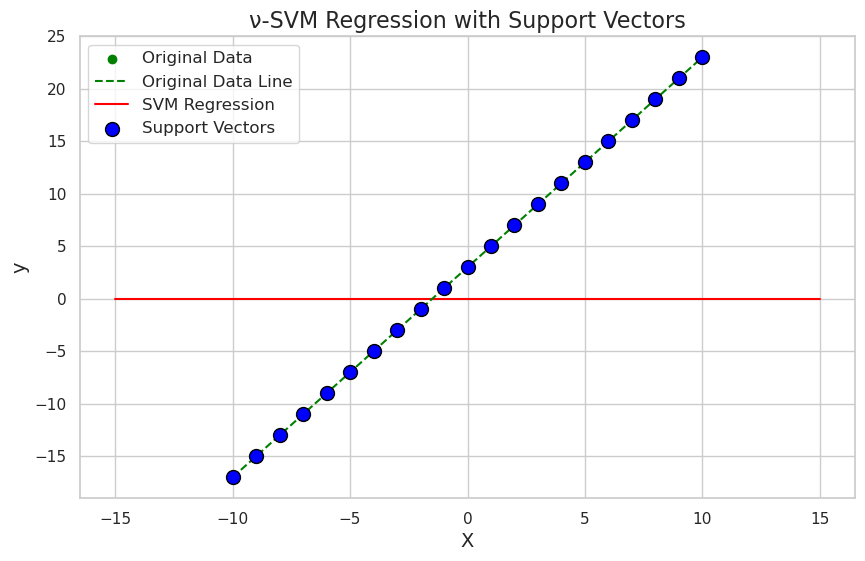

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Basic implementation of ν-SVM for regression
class NuSVMRegression:
    def __init__(self, kernel='linear', C=1.0, epsilon=0.1, nu=0.1):
        self.kernel_type = kernel
        self.C = C
        self.epsilon = epsilon
        self.nu = nu
        self.a = []
        self.a_prime = []
        self.support_vectors = []
        self.support_vector_labels = []
        self.b = 0

    def linear_kernel(self, x1, x2):
        return sum(x1[i] * x2[i] for i in range(len(x1)))

    def rbf_kernel(self, x1, x2, gamma=1.0):
        return sum((x1[i] - x2[i]) ** 2 for i in range(len(x1))) * (-gamma)

    def kernel(self, x1, x2):
        if self.kernel_type == 'linear':
            return self.linear_kernel(x1, x2)
        elif self.kernel_type == 'rbf':
            return self.rbf_kernel(x1, x2)
        else:
            raise ValueError(f"Unknown kernel: {self.kernel_type}")

    def fit(self, X, y):
        n = len(X)
        self.a = [0] * n
        self.a_prime = [0] * n

        # Dual optimization problem
        def L_dual(a, a_prime):
            result = 0
            for i in range(n):
                for j in range(n):
                    result -= 0.5 * (a[i] - a_prime[i]) * (a[j] - a_prime[j]) * self.kernel(X[i], X[j])
            result += sum((a[i] - a_prime[i]) * y[i] for i in range(n))
            return result

        # Initialize parameters (simple gradient ascent optimization)
        for step in range(100):  # Number of optimization steps
            for i in range(n):
                grad = 1 - sum(
                    (self.a[j] - self.a_prime[j]) * self.kernel(X[i], X[j])
                    for j in range(n)
                )
                self.a[i] = min(max(self.a[i] + 0.01 * grad, 0), self.C / n)
                self.a_prime[i] = min(max(self.a_prime[i] - 0.01 * grad, 0), self.C / n)

        # Compute b using support vectors
        for i in range(n):
            if 0 < self.a[i] < self.C / n:
                self.b = y[i] - sum(
                    (self.a[j] - self.a_prime[j]) * self.kernel(X[i], X[j])
                    for j in range(n)
                )
                break

        # Store support vectors
        self.support_vectors = [(X[i], y[i]) for i in range(n) if self.a[i] > 0 or self.a_prime[i] > 0]

    def predict(self, X):
        results = []
        for x in X:
            result = sum(
                (self.a[i] - self.a_prime[i]) * self.kernel(x, sv[0])
                for i, sv in enumerate(self.support_vectors)
            ) + self.b
            results.append(result)
        return results


# Example Usage
if __name__ == "__main__":
    # Synthetic data
    X = [[i] for i in range(-10, 11)]  # Features
    y = [2 * i[0] + 3 for i in X]      # Targets (linear relationship)

    # Train ν-SVM regression
    svm = NuSVMRegression(kernel='linear', C=1.0, epsilon=0.1, nu=0.1)
    svm.fit(X, y)

    # Predict on new data
    X_test = [[i] for i in range(-15, 16)]
    predictions = svm.predict(X_test)

    # Plot the original data and predicted regression curve
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))

    # Plot original data points and connect them with a line
    plt.scatter([i[0] for i in X], y, color='green', label="Original Data", zorder=5)
    plt.plot([i[0] for i in X], y, color='green', linestyle='--', label="Original Data Line", zorder=4)

    # Plot predicted regression curve
    plt.plot([i[0] for i in X_test], predictions, color='red', label="SVM Regression", zorder=3)

    # Plot support vectors
    support_vector_x = [sv[0][0] for sv in svm.support_vectors]
    support_vector_y = [sv[1] for sv in svm.support_vectors]
    plt.scatter(support_vector_x, support_vector_y, color='blue', s=100, label="Support Vectors", edgecolors='black', zorder=10)

    # Customize the plot
    plt.title("ν-SVM Regression with Support Vectors", fontsize=16)
    plt.xlabel("X", fontsize=14)
    plt.ylabel("y", fontsize=14)
    plt.legend(loc='upper left', fontsize=12)

    # Show the plot
    plt.show()
